# RGB Images

This notebook matches corresponding red, green, and blue filtered images and composites them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mars2020 import mars2020api
from collections import Counter

In [2]:
all_data = mars2020api.ImageDataCollection.fetch_all_mars2020_imagedata()

Corresponding images have the same `camera_vector` so we use that to match them up

In [3]:
def match_rgb(r_image: mars2020api.ImageData, g_images: [mars2020api.ImageData], b_images: [mars2020api.ImageData]):
    vector = r_image.camera_type.camera_vector
    g_image = [x for x in g_images if x.camera_type.camera_vector == vector]
    if len(g_image) == 0:
        return None
    g_image = g_image[0]
    b_image = [x for x in b_images if x.camera_type.camera_vector == vector]
    if len(b_image) == 0:
        return None
    b_image = b_image[0]
    return (r_image, g_image, b_image)

This goes through each type of camera on board the Perseverance, extracts the R, G, B filtered images and matches them up with the function above:

In [4]:
rgb_matches = []
for cam_type in all_data.instrument_names:
    cam_images = [x for x in all_data.images if x.camera_type.instrument == cam_type and not x.instrument_metadata.thumbnail]
    filters = Counter([x.instrument_metadata.filter_number for x in cam_images])
    if not set("RGB").difference(filters):
        r_images = [x for x in cam_images if x.instrument_metadata.filter_number == "R"]
        g_images = [x for x in cam_images if x.instrument_metadata.filter_number == "G"]
        b_images = [x for x in cam_images if x.instrument_metadata.filter_number == "B"]
        rgb_matches += [match_rgb(r_image, g_images, b_images) for r_image in r_images]

In [5]:
len(rgb_matches)

47

Put them together and tada!

In [6]:
# Helper function to display a grid of images
def display_images(
    images: [mars2020api.ImageData], 
    columns=5, width=20, height=8):
    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):
        plt.subplot(int(len(images) // columns + 1), columns, i + 1)
        plt.imshow(image.image_data)
        plt.axis("off")

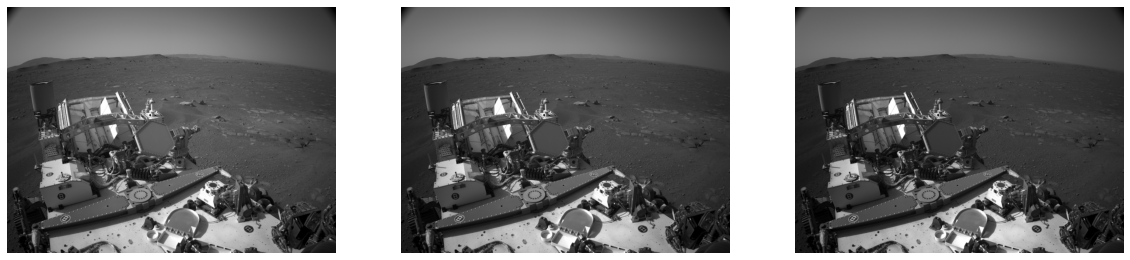

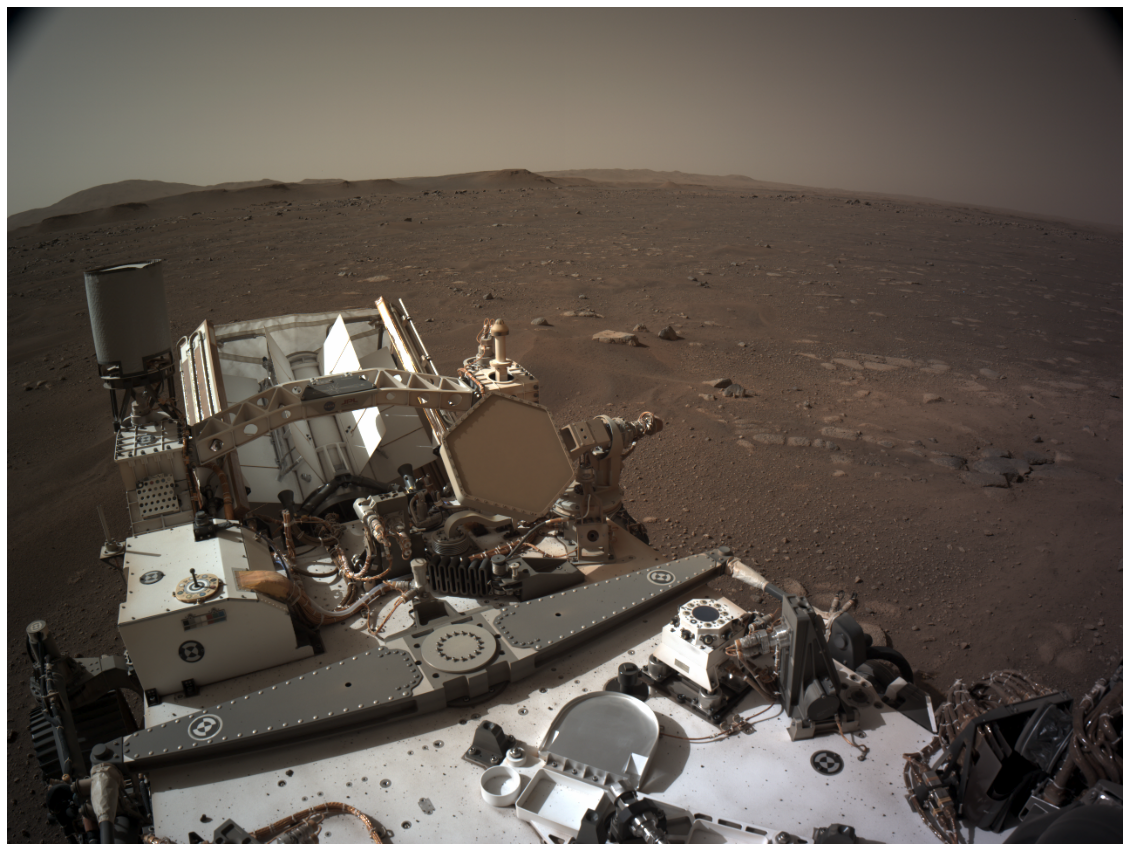

In [7]:
m = rgb_matches[5]
display_images(list(m), columns=3, height=10)
plt.show()
rgb_image = np.zeros((m[0].dimension[1], m[0].dimension[0], 3), dtype=np.int32)
for i in range(3):
    rgb_image[:, :, i] = np.asarray(m[i].image_data.split()[i])
plt.figure(figsize=(20, 20))
plt.imshow(rgb_image)
plt.axis("off")
plt.show()